In [4]:
import polars as pl
import matplotlib.pyplot as plt
import os 

#print(os.getcwd()) #: already in Aggregated_Data folder
df = pl.read_csv("Data\Aggregated_Data\Sector_compounded_yearly_returns.csv")
df_industry = pl.read_csv("Data\Aggregated_Data\Sub-Industry_compounded_yearly_returns.csv")


In [5]:
df_partitiions = df.partition_by("Sector")
df_industry_partitiions = df_industry.partition_by("Sub-Industry")

df_industry_partitiions

[shape: (10, 3)
 ┌──────┬──────────────┬───────────────────┐
 │ Year ┆ Sub-Industry ┆ Compounded Return │
 │ ---  ┆ ---          ┆ ---               │
 │ i64  ┆ str          ┆ f64               │
 ╞══════╪══════════════╪═══════════════════╡
 │ 2015 ┆ Advertising  ┆ 0.100568          │
 │ 2016 ┆ Advertising  ┆ 0.069285          │
 │ 2017 ┆ Advertising  ┆ 0.13765           │
 │ 2018 ┆ Advertising  ┆ 0.497579          │
 │ 2019 ┆ Advertising  ┆ 0.500363          │
 │ 2020 ┆ Advertising  ┆ 0.486524          │
 │ 2021 ┆ Advertising  ┆ 0.40396           │
 │ 2022 ┆ Advertising  ┆ -0.141593         │
 │ 2023 ┆ Advertising  ┆ 0.255455          │
 │ 2024 ┆ Advertising  ┆ 0.169877          │
 └──────┴──────────────┴───────────────────┘,
 shape: (10, 3)
 ┌──────┬─────────────────────┬───────────────────┐
 │ Year ┆ Sub-Industry        ┆ Compounded Return │
 │ ---  ┆ ---                 ┆ ---               │
 │ i64  ┆ str                 ┆ f64               │
 ╞══════╪═════════════════════╪════════

In [6]:
# number of partitions/ Sectors
len(df_partitiions)

11

In [7]:
# list of sectors
sectors = list(df["Sector"].unique())
sectors

['Information Technology',
 'Utilities',
 'Energy',
 'Materials',
 'Consumer Staples',
 'Industrials',
 'Communication Services',
 'Real Estate',
 'Health Care',
 'Financials',
 'Consumer Discretionary']

In [8]:
colors = [
    "blue",
    "orange",
    "mediumseagreen",
    "red",
    "purple",
    "brown",
    "fuchsia",
    "gray",
    "olive",
    "aqua",
    "gold"
]
colors

['blue',
 'orange',
 'mediumseagreen',
 'red',
 'purple',
 'brown',
 'fuchsia',
 'gray',
 'olive',
 'aqua',
 'gold']

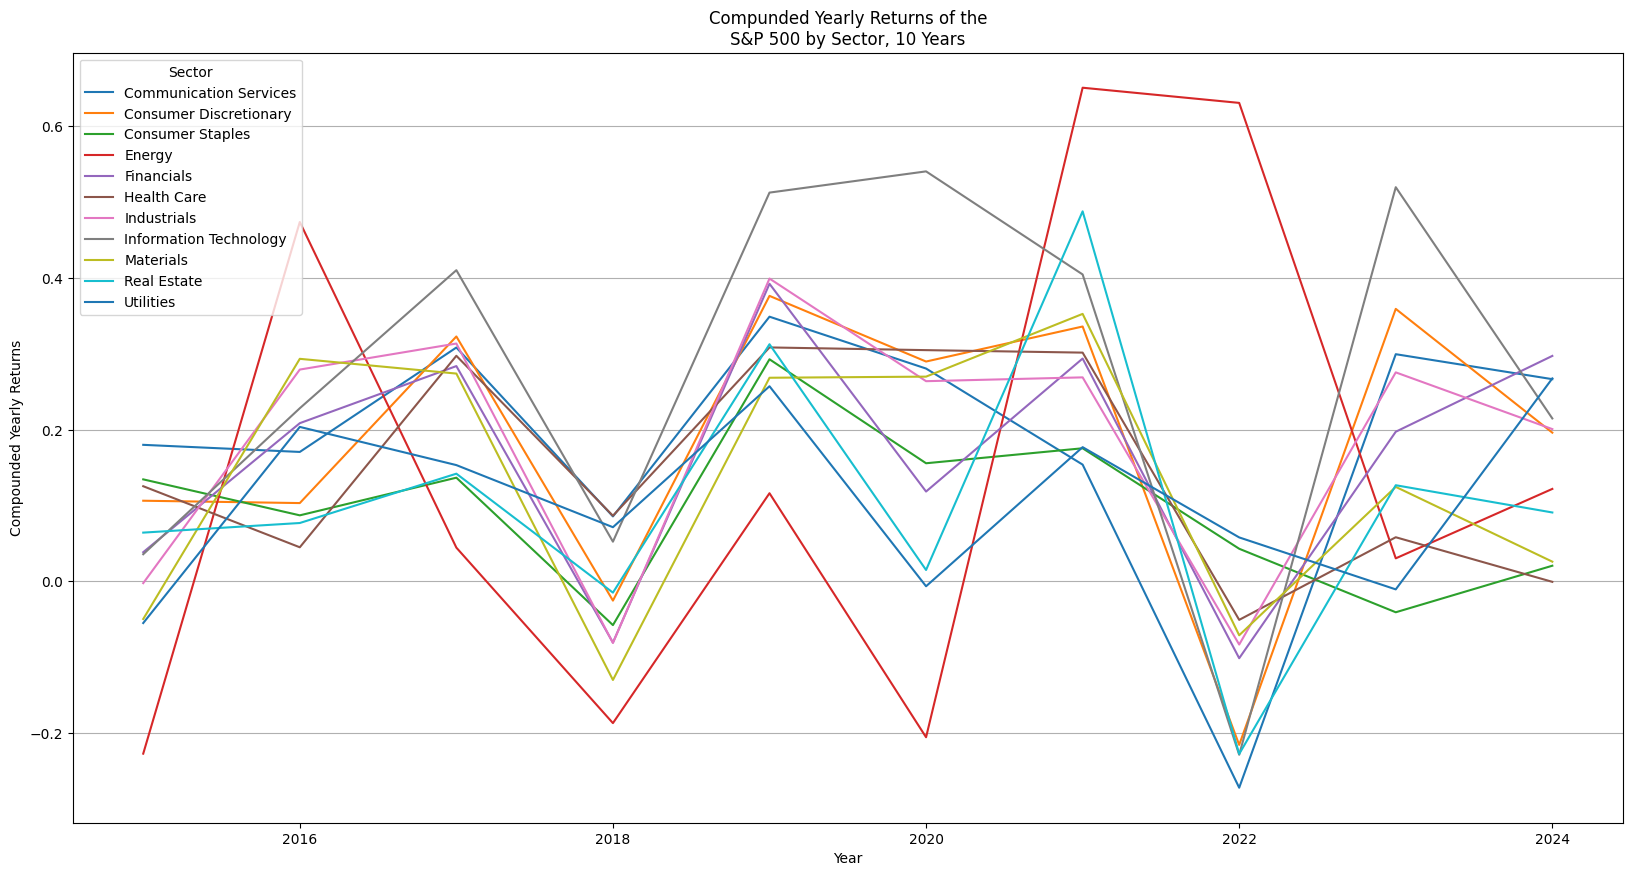

In [9]:
color_map = dict(zip(sectors, colors))
fix, ax = plt.subplots(figsize=(20, 10))

for df_part in df_partitiions:
    sector = df_part["Sector"][0]
    ax.plot(
        df_part["Year"], df_part["Compounded Return"],
        label=sector
)

ax.grid(True, axis="y")
ax.legend(title="Sector", loc='upper left')

ax.set(xlabel="Year",
        ylabel="Compounded Yearly Returns",
        title="Compunded Yearly Returns of the\nS&P 500 by Sector, 10 Years")

plt.show()

In [ ]:

unique_years = df["Year"].unique().to_list()

for year in unique_years:
    df_year = df.filter(pl.col("Year") == year)

    compound = df_year["Compounded Return"]
    sector_labels = df_year["Sector"] 
    wrapped_labels = [ label.replace(' ', '\n') for label in sector_labels ] #Helps formatting

    fig, ax = plt.subplots(figsize=(13, 8))

    ax.bar(
        wrapped_labels,
        compound,
        color=colors
    )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position(('data', 0))

    ax.set(
        ylabel="Compounded Yearly Return",
        title=f"Compunded Return of the\nS&P 500 by Sector, {year}")

    plt.tight_layout()
    plt.show()



We can see how this needs to be broken up into two plots

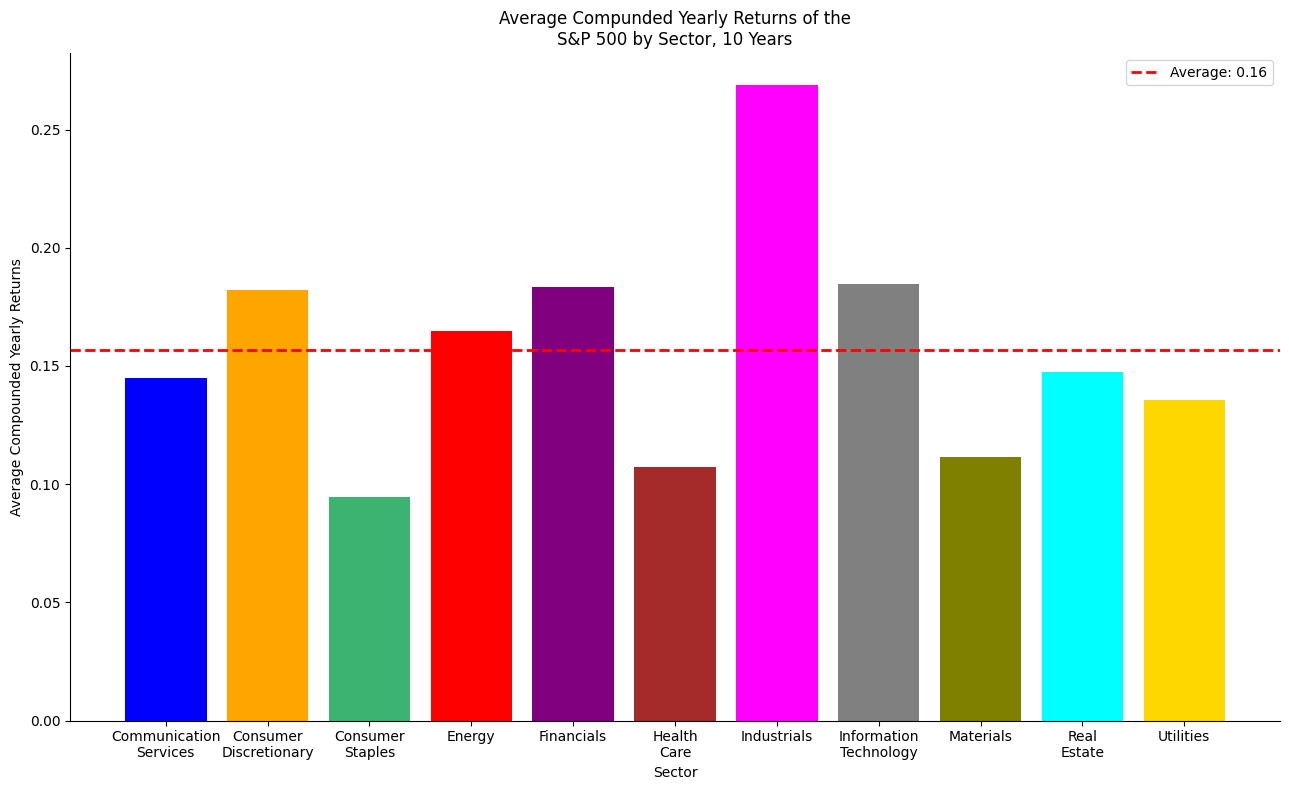

In [11]:
average_returns = (
    df.group_by(["Sector"])
    .agg(
        pl.col("Compounded Return").mean().alias("Average return")
    )
)

average_returns

fig, ax = plt.subplots(figsize=(13, 8))

ax.bar(
    wrapped_labels,
    average_returns["Average return"],
    color=colors
)

avg = average_returns["Average return"].mean()

# draw average line
ax.axhline(avg, color='red', linestyle='--', linewidth=2, label=f'Average: {avg:.2f}')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.set(xlabel="Sector",
        ylabel="Average Compounded Yearly Returns",
        title="Average Compunded Yearly Returns of the\nS&P 500 by Sector, 10 Years")

plt.tight_layout()
plt.show()

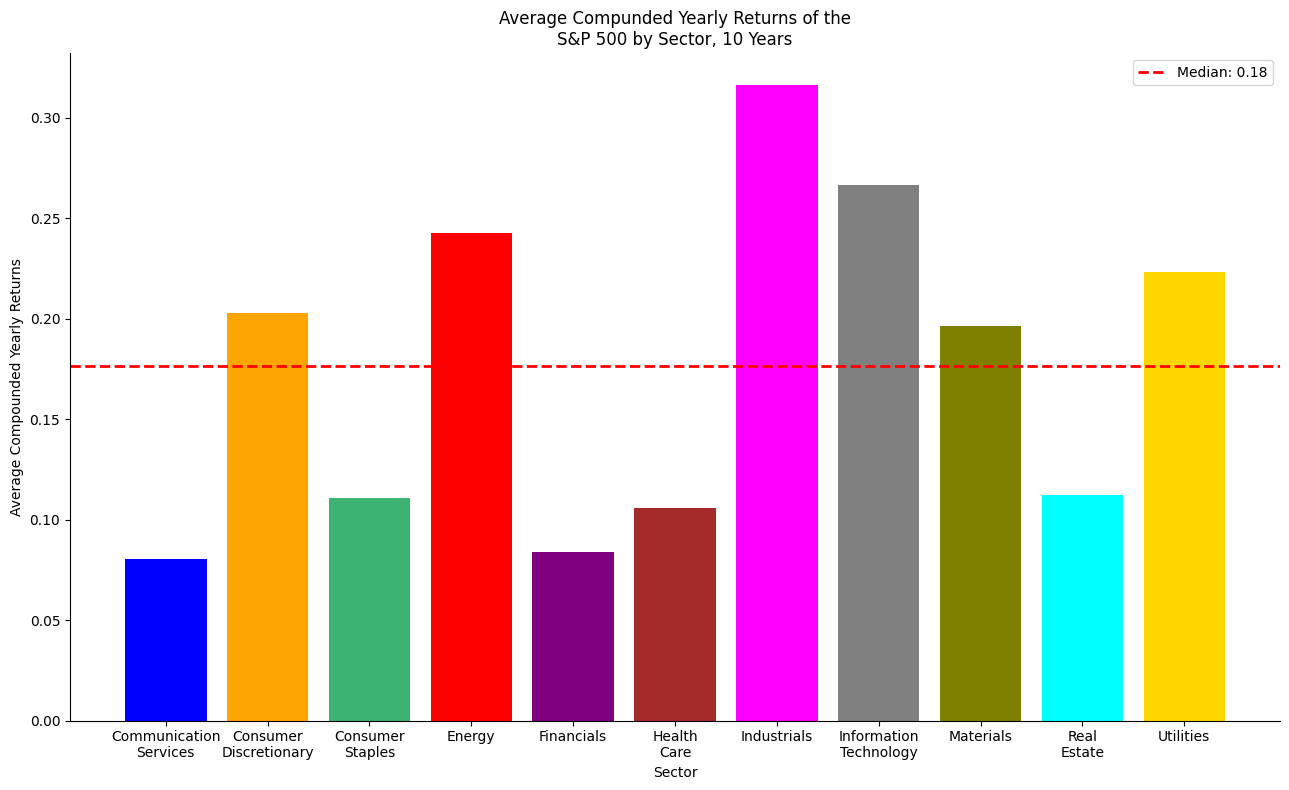

In [ ]:
average_returns = (
    df.group_by(["Sector"])
    .agg(
        pl.col("Compounded Return").median().alias("Average return")
    )
)

average_returns

fig, ax = plt.subplots(figsize=(13, 8))

ax.bar(
    wrapped_labels,
    average_returns["Average return"].sort(),
    color=colors
)

avg = average_returns["Average return"].mean()

# draw average line
ax.axhline(avg, color='red', linestyle='--', linewidth=2, label=f'Median: {avg:.2f}')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.set(xlabel="Sector",
        ylabel="Average Compounded Yearly Returns",
        title="Average Compunded Yearly Returns of the\nS&P 500 by Sector, 10 Years")

plt.tight_layout()
plt.show()

TODO:
- Find average
- Find median
- Determine which measure is the better value to use to break up the plot

In [17]:
average_industry = (
    df_industry.group_by(["Sub-Industry"])
    .agg(
        pl.col("Compounded Return").mean().alias("Average return")
    )
)

top_5 = average_industry.top_k(5, by="Average return")
bot_5 = average_industry.bottom_k(5, by="Average return")
top_bot_5 = pl.concat([top_5, bot_5])

print(top_bot_5["Sub-Industry"].to_list())
# fig, ax = plt.subplots(figsize=(13, 8))

# wrapped_industry = [ label.replace(' ', '\n') for label in top_bot_5["Sub-Industry"] ] #Helps formatting

# ax.bar(
#     wrapped_industry,
#     top_bot_5["Average return"],
#     color=colors
# )


# avg = average_industry["Average return"].mean()

# # draw average line
# ax.axhline(avg, color='red', linestyle='--', linewidth=2, label=f'Median: {avg:.2f}')
# ax.legend()

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_position(('data', 0))

# ax.set(xlabel="Sub-Industry",
#         ylabel="Average Compounded Yearly Returns",
#         title="Average Compunded Yearly Returns of the\nS&P 500 by Sector, 10 Years")

# plt.tight_layout()
# plt.show()

['Heavy Electrical Equipment', 'Semiconductor Materials & Equipment', 'Footwear', 'Systems Software', 'Application Software', 'Health Care Technology', 'Broadcasting', 'Brewers', 'Commodity Chemicals', 'Home Furnishings']
